In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
application_train=pd.read_csv('data/application_train.csv')
application_test=pd.read_csv('data/application_test.csv')
bureau=pd.read_csv('data/bureau.csv')
bureau_balance=pd.read_csv('data/bureau_balance.csv')
credit_card_balance=pd.read_csv('data/credit_card_balance.csv')
installments_payments=pd.read_csv('data/installments_payments.csv')
POS_CASH_balance=pd.read_csv('data/POS_CASH_balance.csv')
previous_application=pd.read_csv('data/previous_application.csv')

In [56]:
def children_categorical(numchildren):
    if numchildren==0:
        return 'None'
    elif numchildren<=3:
        return 'Upto3'
    else:
        return 'MoreThan3'

In [115]:
application_train['CODE_GENDER'].replace('XNA','F',inplace=True)
application_train['ChildrenCategorical']=application_train['CNT_CHILDREN'].apply(lambda x:children_categorical(x))
application_test['ChildrenCategorical']=application_test['CNT_CHILDREN'].apply(lambda x:children_categorical(x))
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,ChildrenCategorical
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,None
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,None
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [3]:
print("application_train: %s, %s"%(application_train.shape[0],application_train.shape[1]))
print("application_test: %s, %s"%(application_test.shape[0],application_test.shape[1]))
print("bureau: %s, %s"%(bureau.shape[0],bureau.shape[1]))
print("bureau_balance: %s, %s"%(bureau_balance.shape[0],bureau_balance.shape[1]))
print("credit_card_balance: %s, %s"%(credit_card_balance.shape[0],credit_card_balance.shape[1]))
print("installments_payments: %s, %s"%(installments_payments.shape[0],installments_payments.shape[1]))
print("POS_CASH_balance: %s, %s"%(POS_CASH_balance.shape[0],POS_CASH_balance.shape[1]))
print("previous_application: %s, %s"%(previous_application.shape[0],previous_application.shape[1]))

application_train: 307511, 122
application_test: 48744, 121
bureau: 1716428, 17
bureau_balance: 27299925, 3
credit_card_balance: 3840312, 23
installments_payments: 13605401, 8
POS_CASH_balance: 10001358, 8
previous_application: 1670214, 37


In [4]:
def na_count(dataframe):
    nacount=dataframe.isnull().sum().sort_values(ascending=False)
    napercent=nacount/dataframe.shape[0]
    return pd.concat([nacount,napercent],axis=1,keys=['Count','Percent'])

In [102]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

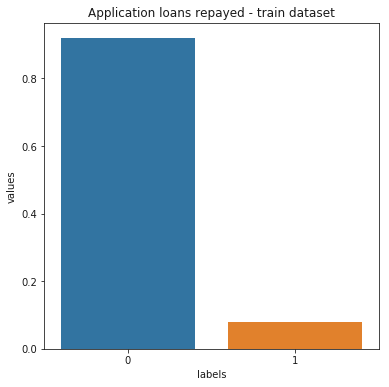

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [116]:
temp=application_train['TARGET'].value_counts()
temp=temp/application_train.shape[0]
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()
temp

In [117]:
def get_statistics(dataframe,index_name,columns='TARGET'):
    table=dataframe.pivot_table(values='SK_ID_CURR',index=index_name,columns='TARGET',aggfunc='count')
    table['rowsum']=table.sum(axis=1)
    table.columns=['Zero','One','RowSum']
    table['ZeroPercent']=table['Zero']/table['RowSum']
    table['OnePercent']=table['One']/table['RowSum']
    return table

In [118]:
for column in categoricalColumns:
    print(column,application_train[column].unique(),application_test[column].unique())
#get_statistics(application_train,'CNT_CHILDREN')

NAME_CONTRACT_TYPE ['Cash loans' 'Revolving loans'] ['Cash loans' 'Revolving loans']
CODE_GENDER ['M' 'F'] ['F' 'M']
FLAG_OWN_CAR ['N' 'Y'] ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N'] ['Y' 'N']
ChildrenCategorical ['None' 'Upto3' 'MoreThan3'] ['None' 'Upto3' 'MoreThan3']


In [130]:
categoricalColumns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','ChildrenCategorical']
numericColumns=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE']
for column in columnsToUse:
    print(get_statistics(application_train,column))

                      Zero    One  RowSum  ZeroPercent  OnePercent
NAME_CONTRACT_TYPE                                                
Cash loans          255011  23221  278232     0.916541    0.083459
Revolving loans      27675   1604   29279     0.945217    0.054783
               Zero    One  RowSum  ZeroPercent  OnePercent
CODE_GENDER                                                
F            188282  14170  202452     0.930008    0.069992
M             94404  10655  105059     0.898581    0.101419
                Zero    One  RowSum  ZeroPercent  OnePercent
FLAG_OWN_CAR                                                
N             185675  17249  202924     0.914998    0.085002
Y              97011   7576  104587     0.927563    0.072437
                   Zero    One  RowSum  ZeroPercent  OnePercent
FLAG_OWN_REALTY                                                
N                 86357   7842   94199     0.916751    0.083249
Y                196329  16983  213312     0.920384    0

In [131]:
get_statistics(application_train,'ChildrenCategorical')

,Zero,One,RowSum,ZeroPercent,OnePercent
ChildrenCategorical,,,,,
MoreThan3,484,71,555,0.872072,0.127928
None,198762,16609,215371,0.922882,0.077118
Upto3,83440,8145,91585,0.911066,0.088934


In [132]:
df_X=application_train[categoricalColumns]
df_X_test=application_test[categoricalColumns]
df_y=application_train['TARGET']
df_X=pd.get_dummies(df_X)
X_test=pd.get_dummies(df_X_test)
from sklearn.model_selection import train_test_split
X_train,X_dev,y_train,y_dev=train_test_split(df_X, df_y, test_size=0.1)

In [133]:
X_test.head()

,CODE_GENDER_F,CODE_GENDER_M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [134]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
logreg.score(X_dev,y_dev)

0.9201352757544224

In [135]:
y_pred=logreg.predict(X_test)
y_pred.min()

0

In [136]:
from sklearn.metrics import confusion_matrix
y_pred=logreg.predict(X_dev)
confusion_matrix = confusion_matrix(y_dev, y_pred)
print(confusion_matrix)


[[28296     0]
 [ 2456     0]]
